<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/Case_Study2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question-2> Even after trying for so many times, your friend’s startup could not find the 
investment. So you decided to take this matter in your hand and try to find the list of 
investors who probably can invest in your friend’s startup. Your list will increase the chance 
of your friend startup getting some initial investment by contacting these investors. Find the 
top 5 investors who have invested maximum number of times (consider repeat investments 
in one company also). In a startup, multiple investors might have invested. So consider each 
investor for that startup. Ignore undisclosed investors.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
files = files.upload()

Saving startup_funding.csv to startup_funding.csv


In [ ]:
data = pd.read_csv("startup_funding.csv")
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [ ]:
df = data.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [ ]:
df.dropna(inplace=True, subset=["InvestorsName"])
df.reset_index(drop=True, inplace=True)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Replace all the undisclosed investors in Investorsname column with NaN and then use dropna() to remove them

In [ ]:
df.loc[df["InvestorsName"]== "Undisclosed investors"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
98,99,23/06/2017,Voxweb,Consumer Internet,Mobile based social networking platform,Mumbai,Undisclosed investors,Seed Funding,"1,000,000",NaN
718,720,22/9/2016,HashTaag,Technology,Mobile App Development company,Bangalore,Undisclosed investors,Seed Funding,"1,000,000",NaN
974,976,28/06/2016,Locanix,Technology,GPS based SaaS Solutions,Ahmedabad,Undisclosed investors,Seed Funding,"300,000",NaN
993,995,03/5/2016,Zwayam,Consumer Internet,Online Recruitment Platform,Bangalore,Undisclosed investors,Seed Funding,"250,000",NaN
994,996,03/5/2016,BoiBanit,Consumer Internet,Online Food Delivery platform,Vadodara,Undisclosed investors,Seed Funding,NaN,NaN
1002,1004,04/5/2016,MyDentistChoice,eCommerce,Medical Supplies eTailer,Hyderabad,Undisclosed investors,Seed Funding,"150,000",NaN
1010,1012,07/5/2016,Zebroads,Logistics,Logistics and Warehousing services,Hyderabad,Undisclosed investors,Seed Funding,"75,000",NaN
1017,1019,10/5/2016,SchoolWear,eCommerce,School Uniform & Supplies Marketplace,Mumbai,Undisclosed investors,Seed Funding,"1,500,000",NaN
1042,1044,19/5/2016,Appie,Consumer Internet,Location-based offline retail discovery platform,Mumbai,Undisclosed investors,Seed Funding,"1,000,000",NaN
1182,1184,10/3/2016,Big Fish Ventures,Food & Beverage,premium dining lounges Chain,New Delhi,Undisclosed investors,Private Equity,"11,100,000",NaN


In [ ]:
df.loc[df["InvestorsName"]== "Undisclosed investors"] = np.nan

In [ ]:
df.dropna(inplace=True, subset=["InvestorsName"])
df.reset_index(drop=True, inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0.0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1.0,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2.0,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3.0,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4.0,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2332,2367.0,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2333,2368.0,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2334,2369.0,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2335,2370.0,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


##Now we have to create a dictionary to store the investors name as key and no. of investments as value

In [ ]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i:
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
              d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

In [ ]:
my_dict = build_dict(df["InvestorsName"])
# my_dict

###Now we will convert my_dict dictionary to datafarame for easy computation

In [ ]:
invest = pd.DataFrame( list(my_dict.values()), list(my_dict.keys()) )     #build pandas dataframe of investors name and its number of investments
invest.head()

,0
Kae Capital,22
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1


Now Sort the Values according to no.of investments

In [ ]:
invest = invest.sort_values(by=[0], ascending=False)

In [ ]:
x=[]
y=[]
for i in range(5):
  x.append(invest.index[i])  #investor's name
  y.append(invest.values[i][0])

print("Top 5 Investors: ")
for j in x:
  print(j)


Top 5 Investors: 
Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


Now plot the graph between top investors and no. of investments

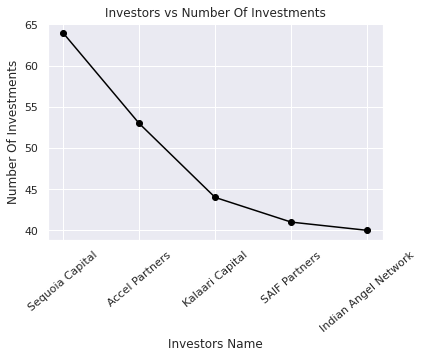

In [ ]:
plt.plot(x,y,color="black",marker="o")
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.xticks(rotation=40)
plt.show()


Text(0.5, 1.0, 'Top 5 Investors and corresponding Number Of Investments In Different Startups')

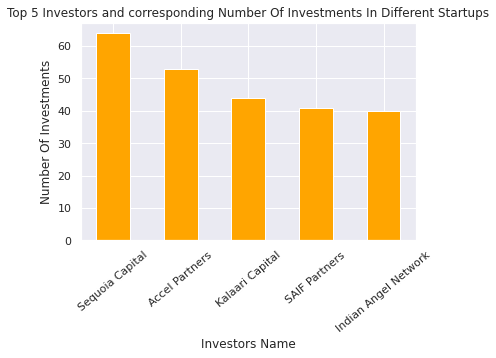

In [ ]:
plt.bar(x,y,color="Orange",width=0.5)
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")

In [ ]:
li = list(zip(x,y))
final_data = pd.DataFrame(li,columns=["Name of Investors", "No. of Investments"])
final_data

,Name of Investors,No. of Investments
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]
